# <font color="Green"> Sending email with Pandas dataframe</font>

# Sending email with Pandas dataframe

In [9]:
'''
WORKING CODE

***
NOTE: MAKE SURE YOU turn on Less secure app access in Google apps if you are using google mails for sending mails
Below is the link to on the access after logging in into your acount:
            Link::  https://myaccount.google.com/lesssecureapps
***

'''

import pandas as pd
import datetime as dt
import smtplib
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from smtplib import SMTP
 

def send_email():
    try:
        recipients = ['rajeshac@gmail.com','rajsahoo@jpmc.com'] 
        emaillist = [elem.strip().split(',') for elem in recipients]
        msg = MIMEMultipart()
        msg['Subject'] = "TEST MAIL:: mail forwarding!!! smtplib"
        msg['From'] = 'xxxxxMail@gmail.com'

        #Change the end date to the current date
        month = dt.datetime.now().strftime("%m")
        day   = dt.datetime.now().strftime("%d")
        year  = dt.datetime.now().strftime("%Y")
        url = 'https://www8.miamidade.gov/Apps/COB/LobbyistOnline/Views/Queries/Registration_ByPeriod_List.aspx?startdate=08%2f01%2f2019&enddate={}%2f{}%2f{}'.format(month,day,year)


        print(type(msg))
        df = pd.read_html(url)
        df = df[3]

        #clean the types, see defaults df.dtypes
        df['Employed On'].astype('datetime64')
        df.drop(df.tail(1).index,inplace=True)
        #df.style.hide_index()

        #Formats the table on the IDLE -> Python Shell display
        pd.set_option('display.max_rows', 500)
        pd.set_option('display.max_columns', 500)
        pd.set_option('display.width', 1000)

        message = df.sort_values(by='Employed On',ascending=False)#.to_string(index=False)

        #print(message)

        html = """ Hi,\\n 
        Marko Please find the attached file \n
        <html>
          <head></head>
          <body>
            {0}
          </body>
        </html>
        """.format(message.to_html(index=False))

        part1 = MIMEText(html, 'html')
        msg.attach(part1)
        
        try:
            """Checking for connection errors"""

            server = smtplib.SMTP('smtp.gmail.com', 587)
            server.ehlo()#NOT NECESSARY
            server.starttls()
            server.ehlo()#NOT NECESSARY
            server.login('xxxxxMail@gmail.com','passwd')
            server.sendmail(msg['From'], emaillist , msg.as_string())
            server.close()
            print("Success::  Email Sent!!!! ")
        
        except Exception as e:
            print("Error for connection: {}".format(e))
        
        
    except Exception as error:
        print(error)
    

send_email()
        

<class 'email.mime.multipart.MIMEMultipart'>
Success::  Email Sent!!!! 


# 2nd version Test !! Did not work :(

NameError: name 'Encoders' is not defined

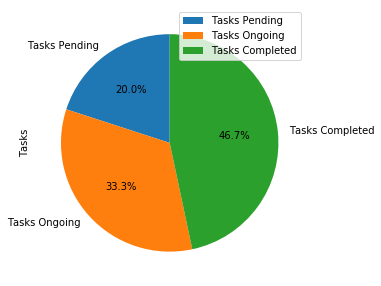

In [25]:
import pandas as pd
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from smtplib import SMTP
import smtplib
import sys,io


# df_1 = ([1,2,3,5])
# df_2 = ([10,20,30,50])

# Data = {'Tasks': [300,500,700]}
# df = pd.DataFrame(Data,columns=['Tasks'],index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])

# df.plot.pie(y='Tasks',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
# df_test =pd.concat([pd.DataFrame(df_1),pd.DataFrame(df_2)],axis=1)


Data = {'Tasks': [300,500,700]}
df = pd.DataFrame(Data,columns=['Tasks'],index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])

plt=df.plot.pie(y='Tasks',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
# fig = pie1.get_figure()
# fig.savefig("piechart.png")

buf = io.BytesIO()
pie.savefig(buf, format = 'png')
buf.seek(0)




recipients = ['recipientID@gmail.com'] 
emaillist = [elem.strip().split(',') for elem in recipients]
msg = MIMEMultipart()
msg['Subject'] = "dataframe table TEST FROM GMAIL"
msg['From'] = 'userId@gmail.com'

html = """\
        <html>
          <head></head>
          <body>
            {0}
          </body>
        </html>
""".format(df.plot.pie(y='Tasks',figsize=(5, 5),autopct='%1.1f%%', startangle=90).to_html(index=False))

# part1 = MIMEText(html, 'html')

part = MIMEBase('application', "octet-stream")
part.set_payload( buf.read() )
Encoders.encode_base64(part)
part.add_header('Content-Disposition', 'attachment; filename="%s"' % 'anything.png')
msg.attach(part)


try:
    """Checking for connection errors"""

    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.ehlo()#NOT NECESSARY
    server.starttls()
    server.ehlo()#NOT NECESSARY
    server.login('userID@gmail.com',Passwd)
    server.sendmail(msg['From'], emaillist , msg.as_string())
    server.close()

except Exception as e:
    print("Error for connection: {}".format(e))


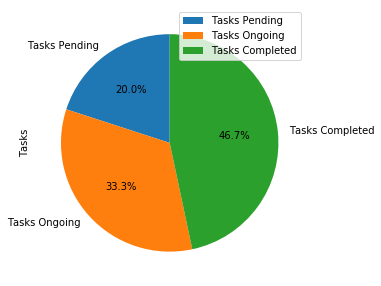

In [17]:
from pandas import DataFrame

Data = {'Tasks': [300,500,700]}
df = DataFrame(Data,columns=['Tasks'],index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])

pie1=df.plot.pie(y='Tasks',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
fig = pie1.get_figure()
fig.savefig("piechart.png")



In [16]:
import os
os.getcwd()
buf.seek()

TypeError: seek() takes at least 1 argument (0 given)

## Test Codes,, Success as in image attachment !!!

<class 'email.mime.multipart.MIMEMultipart'>
Could not guess image MIME subtype


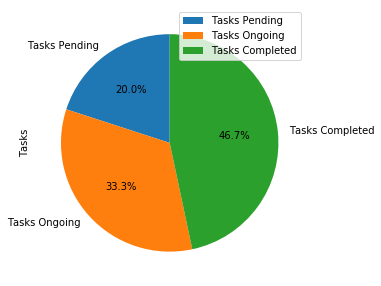

In [27]:
'''
Sending for message as well attached piechart as an attachment!!!

'''

import pandas as pd
import datetime as dt
import smtplib
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
from email import encoders
from smtplib import SMTP
 

def send_email():
    try:
        recipients = ['rajeshac@gmail.com'] 
        emaillist = [elem.strip().split(',') for elem in recipients]
        msg = MIMEMultipart()
        msg['Subject'] = "TEST MAIL:: mail forwarding!!! smtplib"
        msg['From'] = 'xxxxxMail@gmail.com'

        #Change the end date to the current date
        month = dt.datetime.now().strftime("%m")
        day   = dt.datetime.now().strftime("%d")
        year  = dt.datetime.now().strftime("%Y")
        url = 'https://www8.miamidade.gov/Apps/COB/LobbyistOnline/Views/Queries/Registration_ByPeriod_List.aspx?startdate=08%2f01%2f2019&enddate={}%2f{}%2f{}'.format(month,day,year)
        print(type(msg))
        df = pd.read_html(url)
        df = df[3]

#         clean the types, see defaults df.dtypes
        df['Employed On'].astype('datetime64')
        df.drop(df.tail(1).index,inplace=True)
        df.style.hide_index()

#         Formats the table on the IDLE -> Python Shell display
        pd.set_option('display.max_rows', 500)
        pd.set_option('display.max_columns', 500)
        pd.set_option('display.width', 1000)

        message = df.sort_values(by='Employed On',ascending=False)#.to_string(index=False)

        #print(message)
    

        Data = {'Tasks': [300,500,700]}
        df = pd.DataFrame(Data,columns=['Tasks'],index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])

        pie1=df.plot.pie(y='Tasks',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
        fig = pie1.get_figure()
        fig.savefig("piechart.png")

        html = """ 
        <html>
          <head>
          
          <p>Hi Rajesh, <br/>
          
          Please find the attached table along
          <br/><br/>
          
          </head>
          <body>
            {0}
          </body>
        </html>
        """.format(message.to_html(index=False))

        part1 = MIMEText(html, 'html')
        msg.attach(part1)
#         msg.attach(MIMEImage(file("piechart.png").read()))
        
        with open("piechart.png", 'rb') as fp:
            img = MIMEImage(fp.read())
        
        msg.attach(img)
        
        
        try:
            """Checking for connection errors"""

            server = smtplib.SMTP('smtp.gmail.com', 587)
            server.ehlo()#NOT NECESSARY
            server.starttls()
            server.ehlo()#NOT NECESSARY
            server.login('xxxxxMail@gmail.com','passwd')
            server.sendmail(msg['From'], emaillist , msg.as_string())
            server.close()
            print("Success::  Email Sent!!!! ")
        
        except Exception as e:
            print("Error for connection: {}".format(e))
        
        
    except Exception as error:
        print(error)
    

send_email()
        

## Test code for as an image attached along in emails !!! Sucess in attching image with data

<class 'email.mime.multipart.MIMEMultipart'>
Success::  Email Sent!!!! 


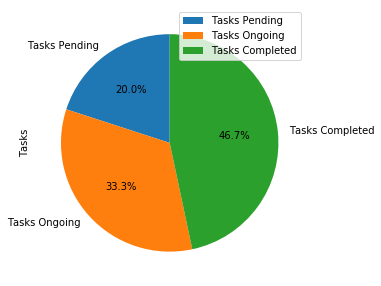

In [7]:
'''
Sending for message as well attached piechart as an email piechart diagram!!!

'''

import pandas as pd
import datetime as dt
import smtplib
from PIL import Image
import base64
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
from email import encoders
from smtplib import SMTP
 

def send_email():
    try:
        recipients = ['rajeshac@gmail.com'] 
        emaillist = [elem.strip().split(',') for elem in recipients]
        msg = MIMEMultipart()
        msg['Subject'] = "TEST MAIL:: mail forwarding!!! smtplib"
        msg['From'] = 'xxxxxMail@gmail.com'
#         image_encoded = base64.b64encode(open(path, 'rb').read())


        #Change the end date to the current date
        month = dt.datetime.now().strftime("%m")
        day   = dt.datetime.now().strftime("%d")
        year  = dt.datetime.now().strftime("%Y")
        url = 'https://www8.miamidade.gov/Apps/COB/LobbyistOnline/Views/Queries/Registration_ByPeriod_List.aspx?startdate=08%2f01%2f2019&enddate={}%2f{}%2f{}'.format(month,day,year)
        print(type(msg))
        df = pd.read_html(url)
        df = df[3]

#         clean the types, see defaults df.dtypes
        df['Employed On'].astype('datetime64')
        df.drop(df.tail(1).index,inplace=True)
        df.style.hide_index()

#         Formats the table on the IDLE -> Python Shell display
        pd.set_option('display.max_rows', 500)
        pd.set_option('display.max_columns', 500)
        pd.set_option('display.width', 1000)

        message = df.sort_values(by='Employed On',ascending=False)#.to_string(index=False)

        #print(message)
    

        Data = {'Tasks': [300,500,700]}
        df = pd.DataFrame(Data,columns=['Tasks'],index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])

        pie1=df.plot.pie(y='Tasks',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
        fig = pie1.get_figure()
        fig.savefig("piechart.png")
        attachment='piechart.png'
        
        body=""" Hi Rajesh,\n
            Please find the chart below!! \n """
        msgText = MIMEText('<b>%s</b><br><img src="cid:%s"><br>' % (body, attachment), 'html')  
        msg.attach(msgText)   # Added, and edited the previous line

        fp = open(attachment, 'rb')                                                    
        img = MIMEImage(fp.read())
        fp.close()
        img.add_header('Content-ID', '<{}>'.format(attachment))
        msg.attach(img)
#         data_uri = base64.b64encode(open('piechart.png', 'rb').read()).decode('utf-8')
#         img_tag = '<img src="data:image/png;base64,{0}">'.format(data_uri)
# #         print(img_tag)


#         html = """ 
#         <html>
#           <head>
#           <p>Hi Rajesh, <br/><br/>
          
#           Please find the attached table along
#           <br/>
#           </p>
#           </head>
#           <body>
#             {0}
#           </body>
#         </html>
#         """.format(img_tag)

#         part1 = MIMEText(html, 'html')
#         msg.attach(part1)
# #         msg.attach(MIMEImage(file("piechart.png").read()))
        
#         with open("piechart.png", 'rb') as fp:
#             img = MIMEImage(fp.read())
        
# #         msg.attach(img)
        
        
        try:
            """Checking for connection errors"""

            server = smtplib.SMTP('smtp.gmail.com', 587)
            server.ehlo()#NOT NECESSARY
            server.starttls()
            server.ehlo()#NOT NECESSARY
            server.login('xxxxxMail@gmail.com','passwd')
            server.sendmail(msg['From'], emaillist , msg.as_string())
            server.close()
            print("Success::  Email Sent!!!! ")
        
        except Exception as e:
            print("Error for connection: {}".format(e))
        
        
    except Exception as error:
        print(error)
    

send_email()
        

# Fullfledged code for Having table as well as the graphs Dataframe

In [42]:
from pandas import DataFrame

Data = {'Tasks': [300,500,700]}
df = DataFrame(Data,columns=['Tasks'],index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])
df

,Tasks
Tasks Pending,300
Tasks Ongoing,500
Tasks Completed,700


Drafting email
Sending......
Sending......
Sending......
Error for connection: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials 67sm2861315pfw.82 - gsmtp')
Mail sent successfully !!!


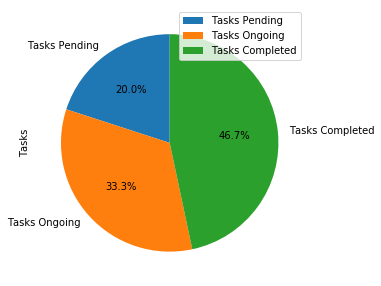

In [16]:
'''
Sending for message as well attached piechart as an email piechart diagram!!!

Working codes below

'''

import pandas as pd
import datetime as dt
import smtplib
from PIL import Image
import base64
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
from email import encoders
from smtplib import SMTP
 

def send_email():
    try:
        recipients = ['rajeshac@gmail.com','shivamsingh@gmail.com'] 
        emaillist = [elem.strip().split(',') for elem in recipients]
        msg = MIMEMultipart()
        msg['Subject'] = "Fuck you !!! beta"
        msg['From'] = 'xxxxxMail@gmail.com'

        print('Sending......')

        Data = {'Tasks': [300,500,700]}
        df = pd.DataFrame(Data,columns=['Tasks'],index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])

        pie1=df.plot.pie(y='Tasks',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
        fig = pie1.get_figure()
        fig.savefig("piechart.png")
        attachment='piechart.png'
        
        body=r'<p>Hi Rajesh, <br/><br/> Please find the attached tables along wit atatched piechart <br/><br/> {0}</p>'.format(df.to_html(index=False))
        msgText = MIMEText('<b>%s</b><br><img src="cid:%s"><br>' % (body, attachment), 'html')  
        msg.attach(msgText)   # Added, and edited the previous line
        print('Sending......')
        fp = open(attachment, 'rb')                                                    
        img = MIMEImage(fp.read())
        fp.close()
        img.add_header('Content-ID', '<{}>'.format(attachment))
        msg.attach(img)
        
        print('Sending......')
        try:
            """Checking for connection errors if any?"""

            server = smtplib.SMTP('smtp.gmail.com', 587)
            server.ehlo()#NOT NECESSARY
            server.starttls()
            server.ehlo()#NOT NECESSARY
            server.login('xxxxxMail@gmail.com','passwd')
            print("On the way :P ......")
            server.sendmail(msg['From'], emaillist , msg.as_string())
            server.close()
            print("Success::  Email Sent!!!! ")
        
        except Exception as e:
            print("Error for connection: {}".format(e))
        
        
    except Exception as error:
        print(error)
    



if __name__ == "__main__":
    
    print("Drafting email")
    send_email()
    
print("Mail sent successfully !!!")
        

# Sending files (excel or pdf or anything) as an attachment

In [24]:
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
from email.mime.base import MIMEBase 
from email import encoders 
   
fromaddr = "xxxxxMail@gmail.com"
toaddr = "rajeshac@gmail.com"
   
# instance of MIMEMultipart 
msg = MIMEMultipart() 
  
# storing the senders email address   
msg['From'] = fromaddr 
  
# storing the receivers email address  
msg['To'] = toaddr 
  
# storing the subject  
msg['Subject'] = "Subject of the Mail"
  
# string to store the body of the mail 
body = "Body_of_the_mail"
  
# attach the body with the msg instance 
msg.attach(MIMEText(body, 'plain')) 
  
# open the file to be sent  
filename = "attachment.pdf"
attachment = open("attachment.pdf", "rb") 
  
# instance of MIMEBase and named as p 
p = MIMEBase('application', 'octet-stream') 
  
# To change the payload into encoded form 
p.set_payload((attachment).read()) 
  
# encode into base64 
encoders.encode_base64(p) 
   
p.add_header('Content-Disposition', "attachment; filename= %s" % filename) 
  
# attach the instance 'p' to instance 'msg' 
msg.attach(p) 
  
# creates SMTP session 
s = smtplib.SMTP('smtp.gmail.com', 587) 
  
# start TLS for security 
s.starttls() 
  
# Authentication 
s.login(fromaddr, "passwd") 
  
# Converts the Multipart msg into a string 
text = msg.as_string() 
  
# sending the mail 
s.sendmail(fromaddr, toaddr, text) 
  
# terminating the session 
s.quit()

(221, b'2.0.0 closing connection x10sm16749396pfn.36 - gsmtp')